In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Data Loading

df = pd.read_csv("loan.csv")
df.shape

(39717, 111)

In [3]:
#  MISSING VALUE CHECK

100*df.isnull().mean()

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [4]:
# We can see some missing value columns, whose missing value % are greater than 40%.
# So we'll simple remove them, any insights made from those columns aren't useful due to lack of info.

null_cols = df.columns[df.isnull().mean() > 0.4]
df = df.drop(null_cols, axis=1)
100*df.isnull().mean()

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [5]:
extra_cols = ["desc", "emp_title"]
df = df.drop(extra_cols, axis=1)

In [6]:
df.shape

some_null_cols = ["tax_liens","pub_rec_bankruptcies","chargeoff_within_12_mths","collections_12_mths_ex_med","last_credit_pull_d","last_pymnt_d","revol_util","emp_length","title"]

for col in some_null_cols:
    df = df[df[col].notna()]

In [7]:
df.shape

(37823, 52)

In [8]:
100*df.isnull().mean()
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [50]:
# Function to extract numeric part from the "term" column
def extract_term(term):
    return int(term.split()[0])

# Apply the function to the "term" column
df['term'] = df['term'].apply(extract_term)

AttributeError: 'int' object has no attribute 'split'

In [51]:
# Remove '%' and convert to numerical
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')

# Display the updated DataFrame
print(df['int_rate'])

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39475     9.01
39551    10.91
39562    10.28
39573    10.59
39623    12.49
Name: int_rate, Length: 37823, dtype: float64


In [67]:
cat_cols=["home_ownership", "verification_status","loan_status","purpose","delinq_2yrs"] 
num_cols=["loan_amnt","term","int_rate", "installment","emp_length","annual_inc","open_acc","dti","pub_rec","total_acc","acc_now_delinq",] 
extras_cols=["id", "member_id","funded_amnt","funded_amnt_inv","grade","sub_grade","issue_d","pymnt_plan","url","title","zip_code","addr_state","earliest_cr_line","inq_last_6mths","revol_bal","revol_util","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int", "total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","collections_12_mths_ex_med","policy_code","chargeoff_within_12_mths","delinq_amnt","pub_rec_bankruptcies","tax_liens"]

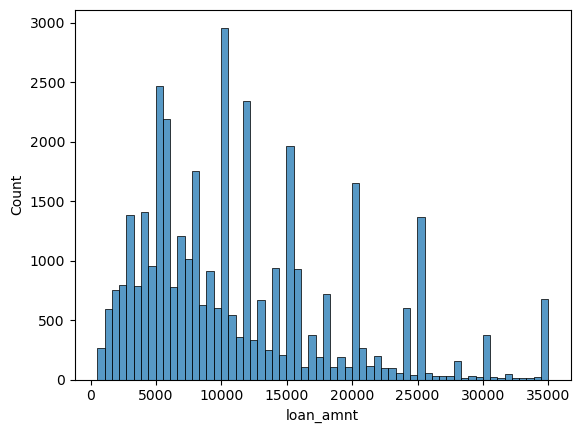

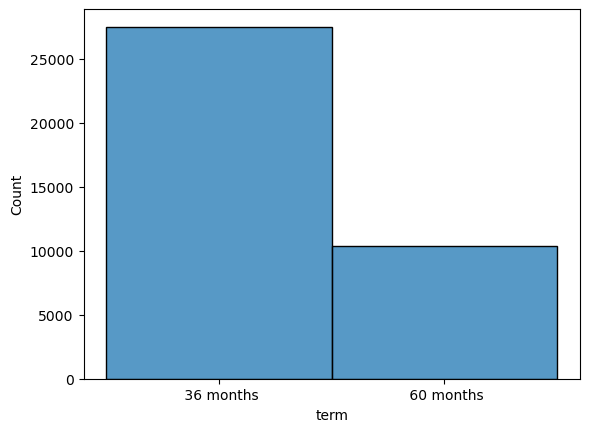

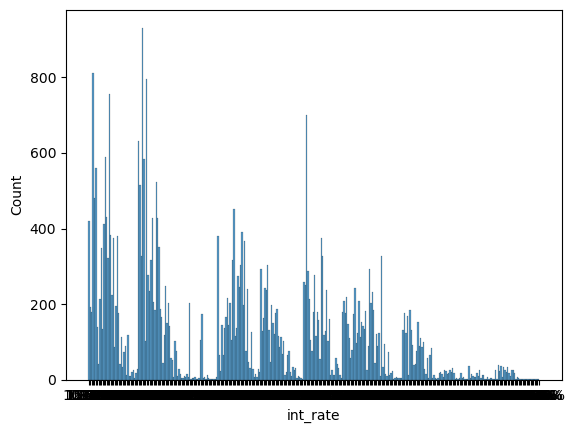

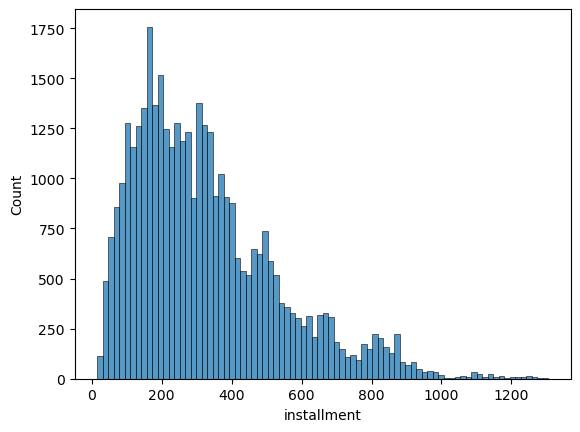

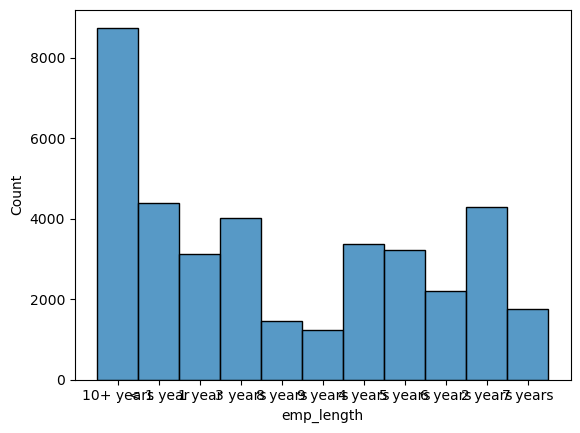

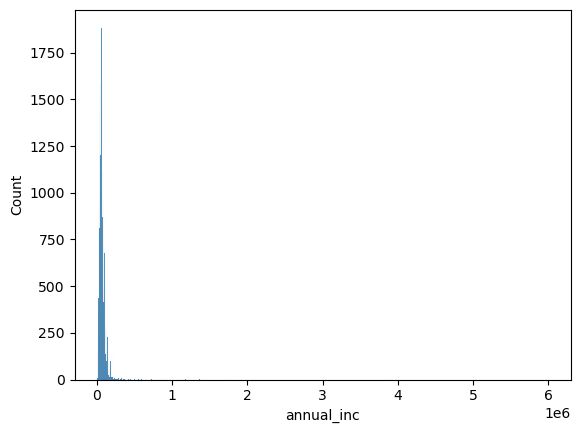

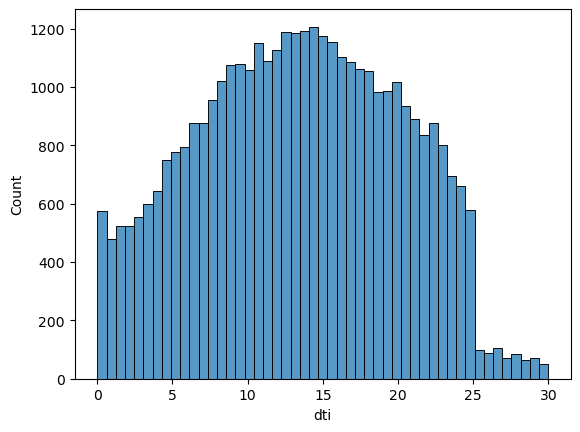

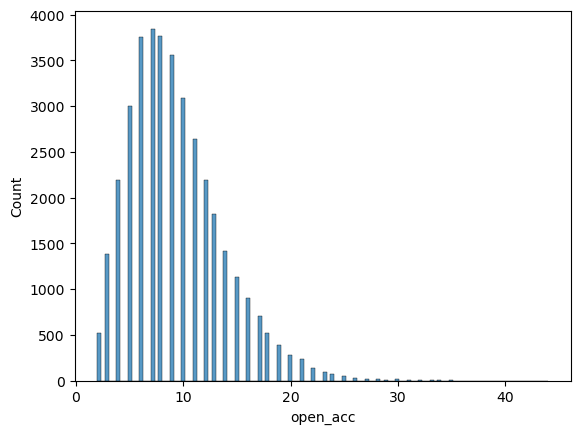

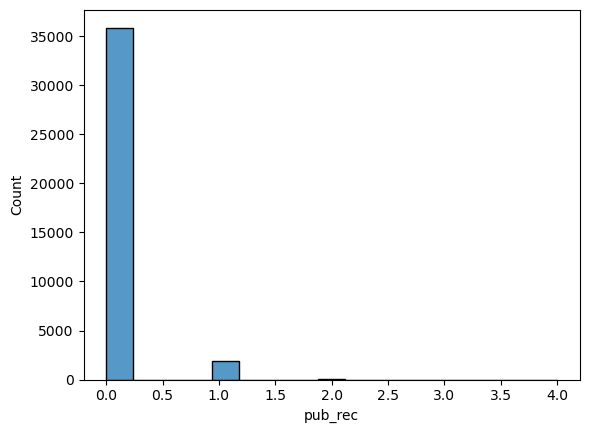

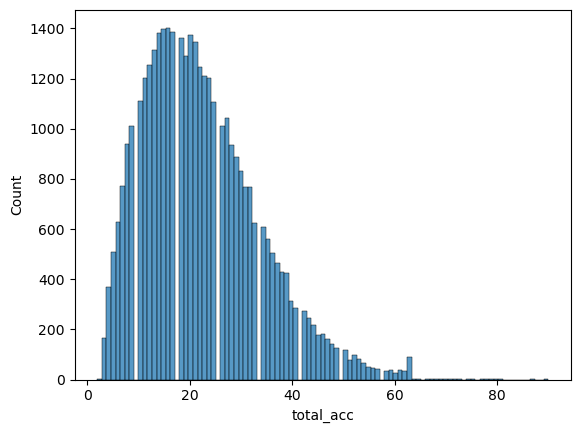

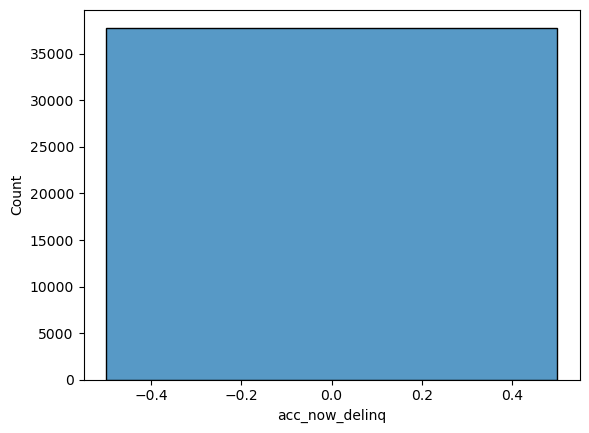

In [10]:
#Univariate Analysis

for col in num_cols:
    sns.histplot(x=df[col])
    plt.show()

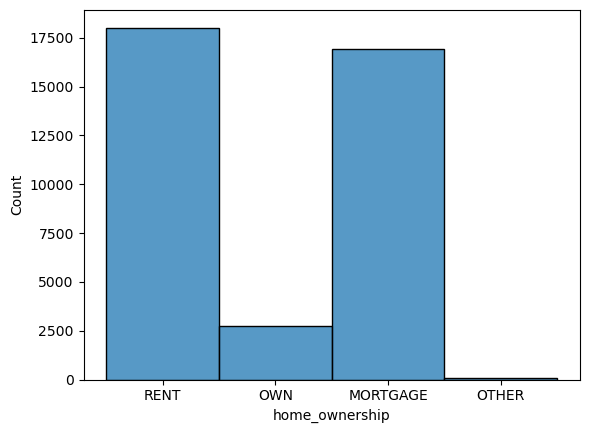

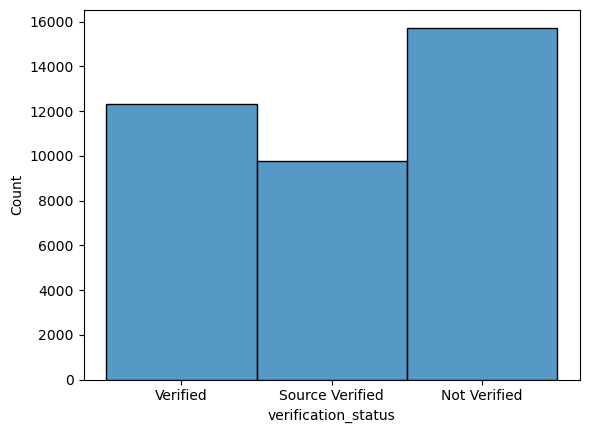

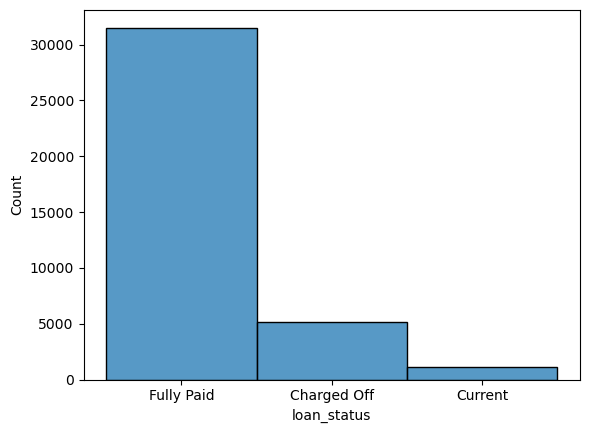

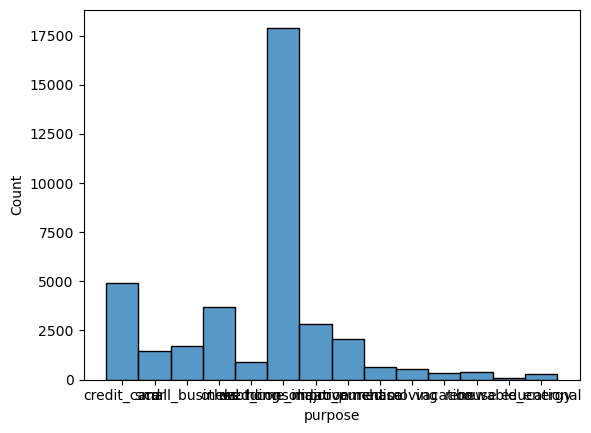

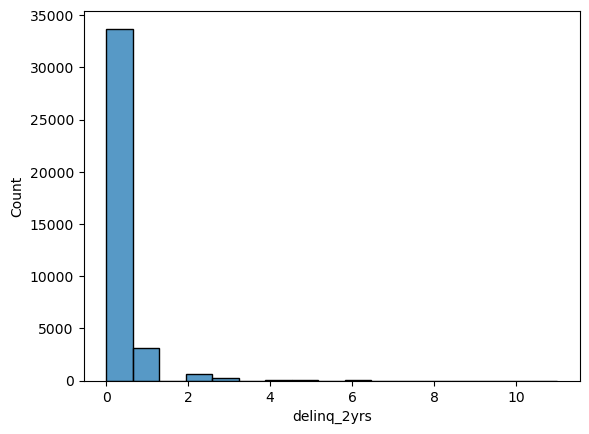

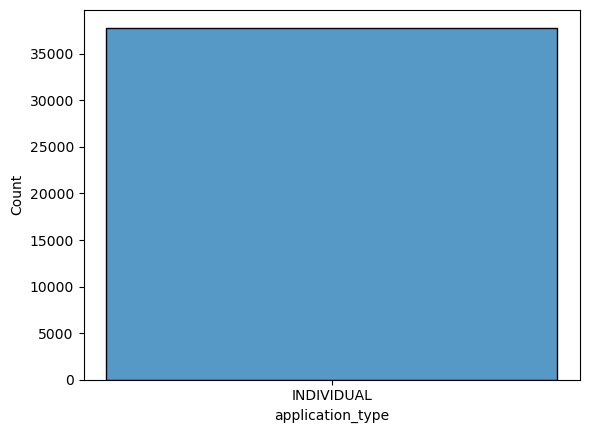

In [13]:
for col in cat_cols:
    sns.histplot(x=df[col])
    plt.show()

In [26]:
# Removing the 1.00E+05 values from the annual_inc column

mask = df["annual_inc"].astype(str).str.startswith('1.00E')

# Display rows with values starting with 1.00E
rows_with_1e = df[mask]
print(rows_with_1e)

# Replace values in those rows
df.loc[mask, "annual_inc"] = df.loc[mask, "annual_inc"].astype(float)

# Display the updated DataFrame
print("\nDataFrame after replacing values:")
print(df)

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []

[0 rows x 52 columns]

DataFrame after replacing values:
            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500       

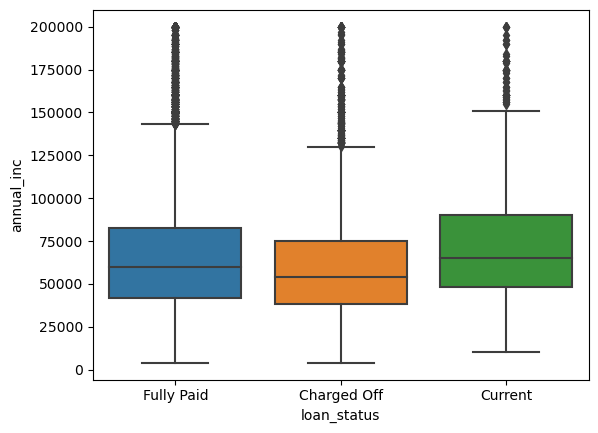

In [37]:
## LOAN_STATUS vs ANNUAL_INC

# Removing the outliers in the annual income column and then plotting a boxplot with loan_status
# Filter the data for annual_inc values from 0 to 200,000
filtered_df = df[(df['annual_inc'] >= 0) & (df['annual_inc'] <= 200000)]

# Create a boxplot for the filtered data
sns.boxplot(x=filtered_df["loan_status"], y=filtered_df["annual_inc"])
plt.show()

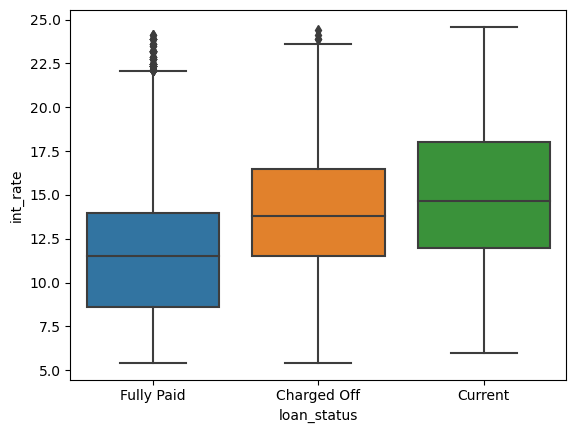

In [65]:
bv_cols = ["dti","loan_amnt","term","int_rate", "installment","annual_inc","open_acc","pub_rec","total_acc","acc_now_delinq"] 


sns.boxplot(x=df["loan_status"], y=df["int_rate"])
plt.show()


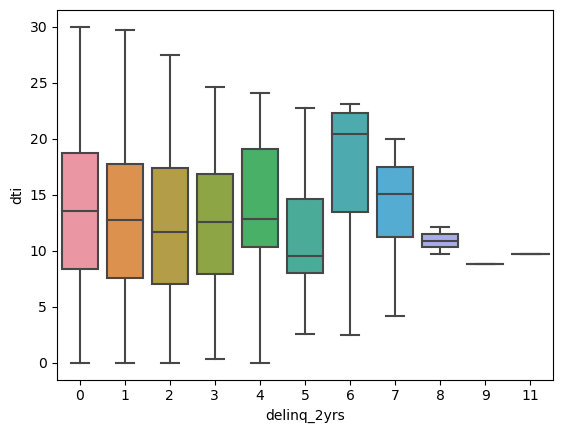

In [59]:
# delinq_2yrs vs dti

sns.boxplot(x=df["delinq_2yrs"], y=df["dti"])
plt.show()

## According to this graph, we can conclude that if a person is defaulting the loan payment for
## 30+ days, more than 5 times in a period of 2 years.

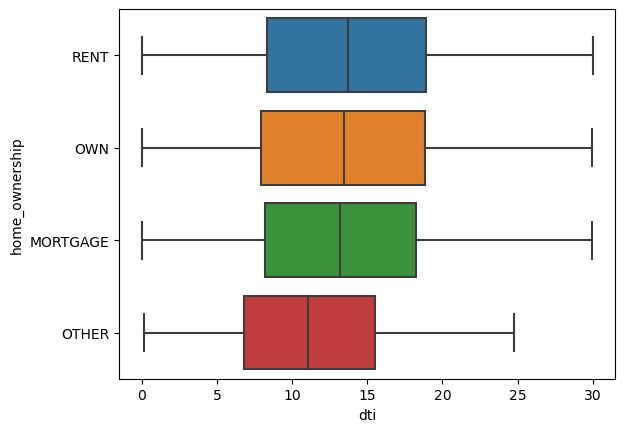

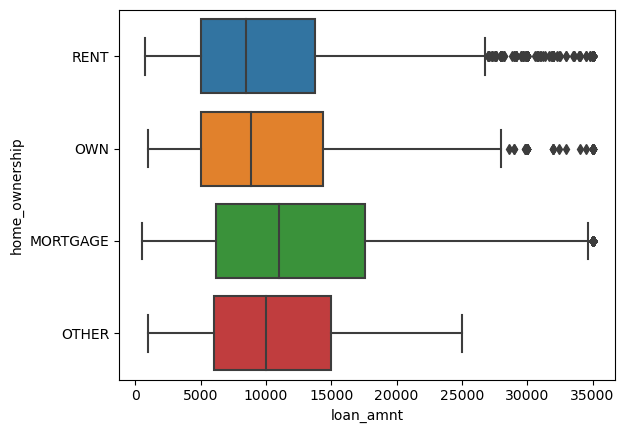

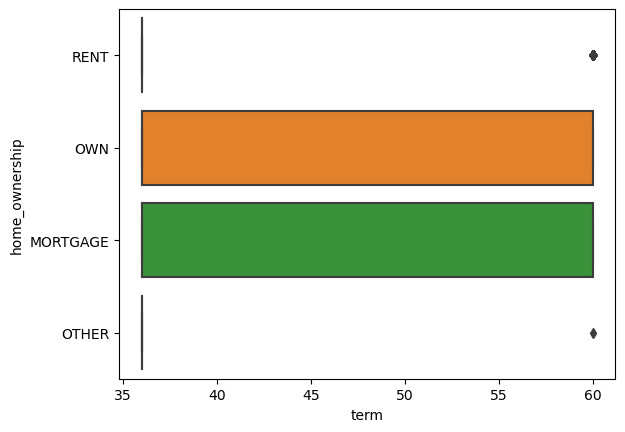

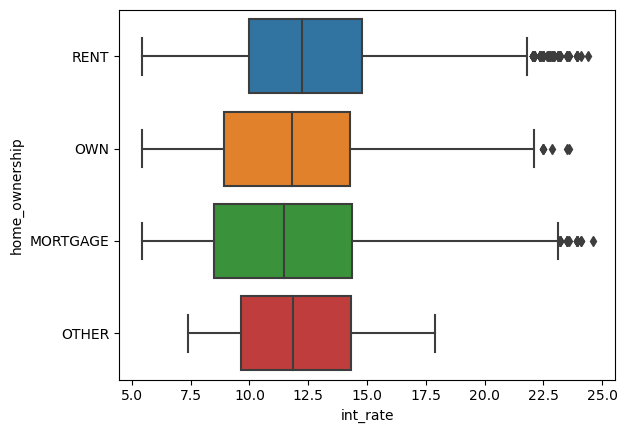

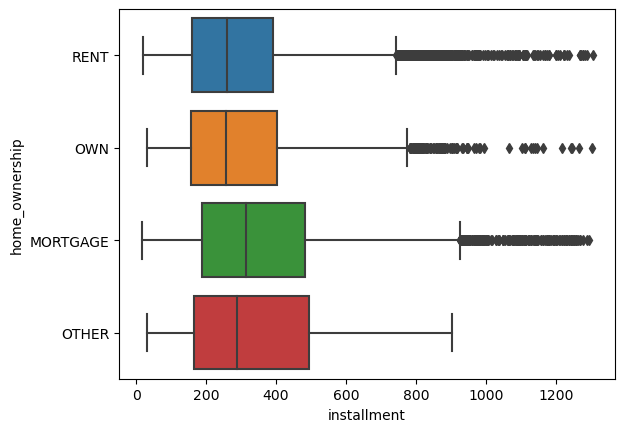

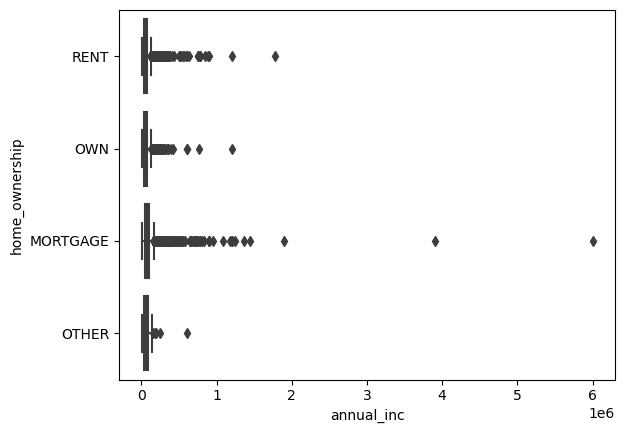

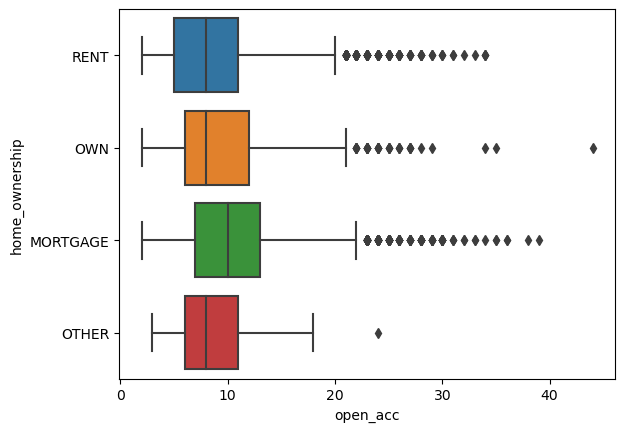

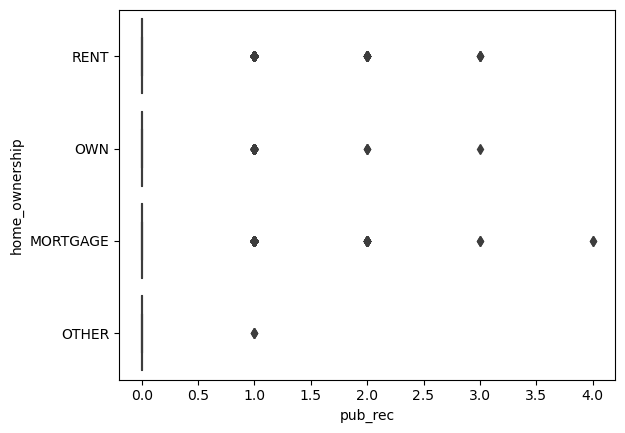

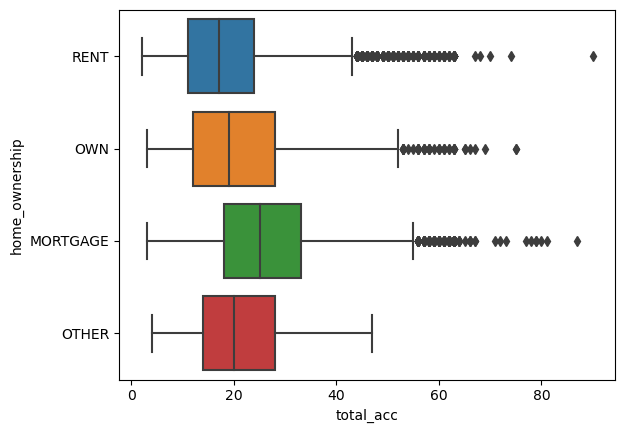

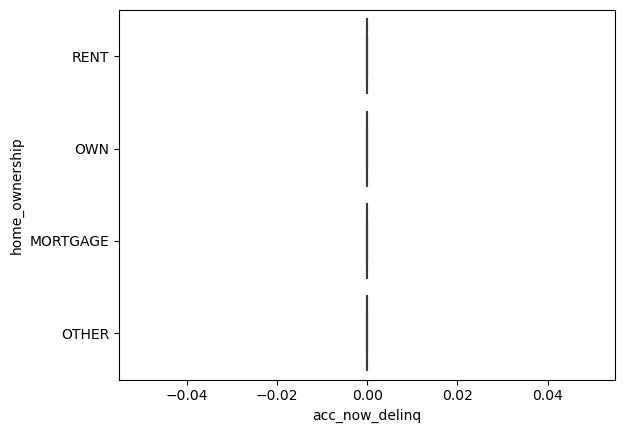

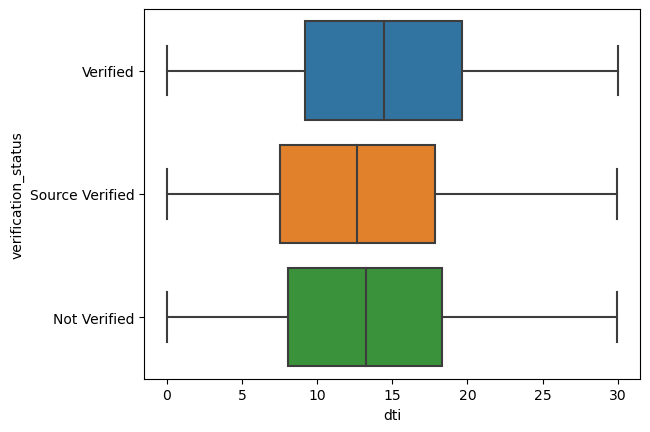

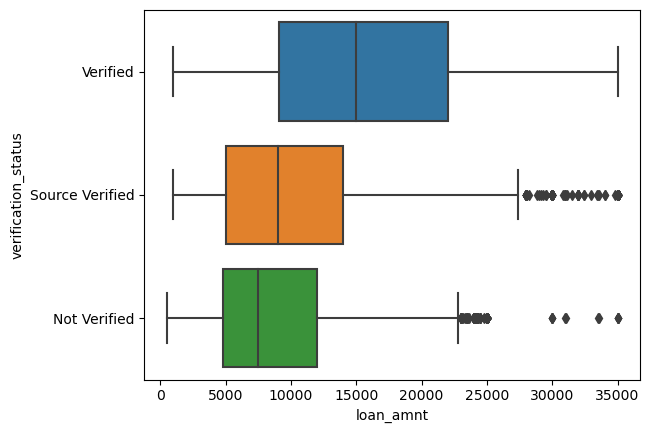

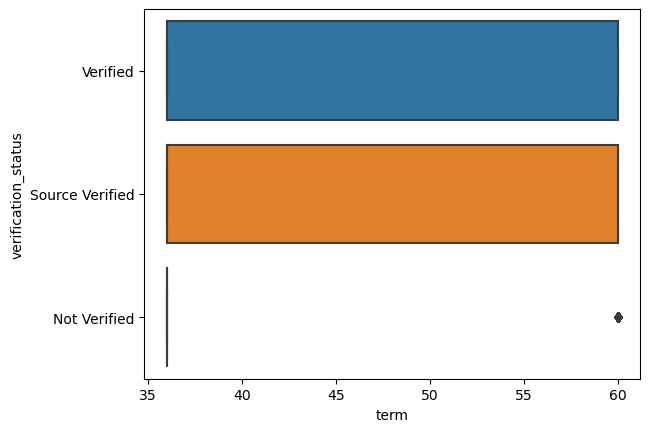

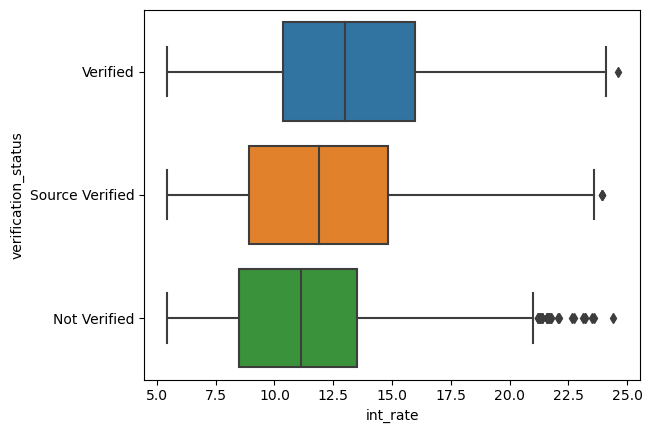

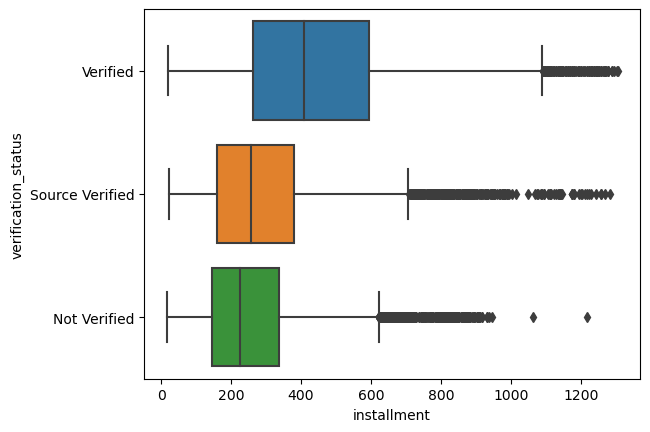

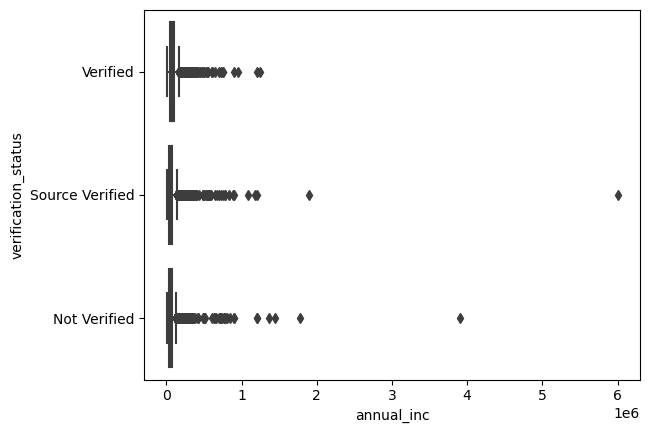

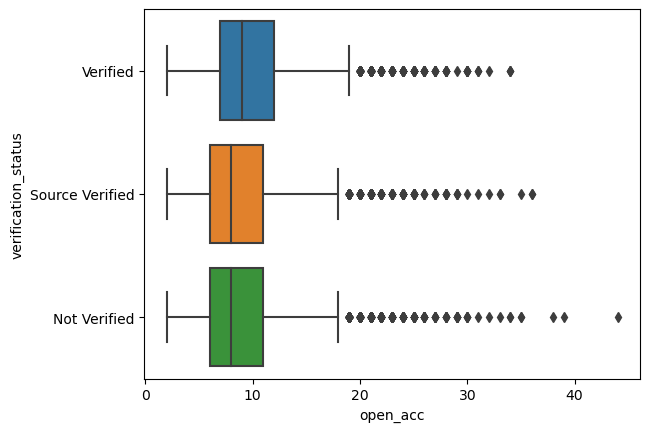

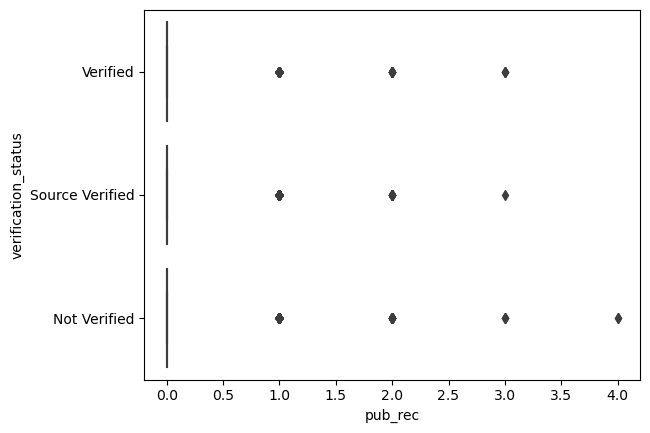

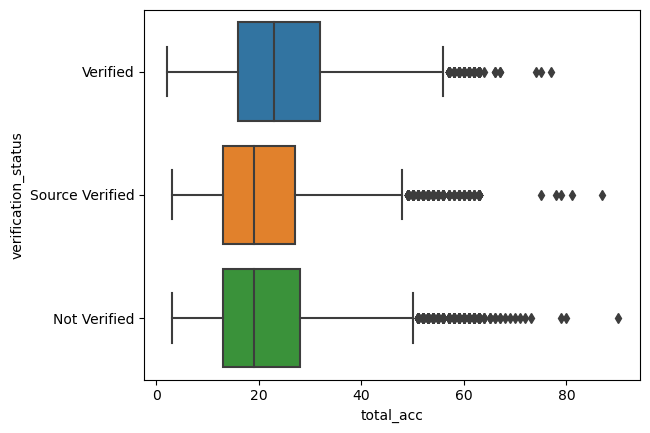

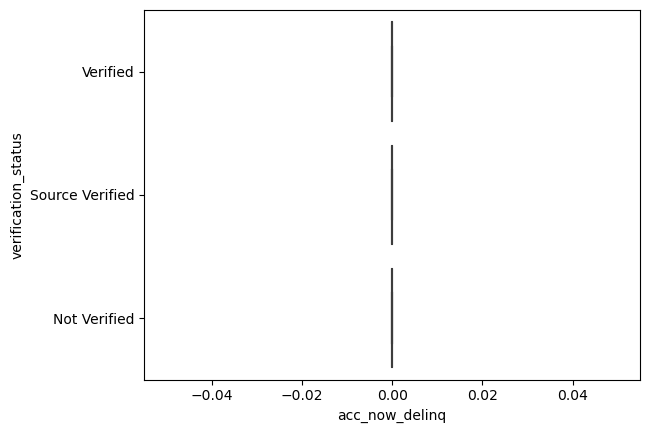

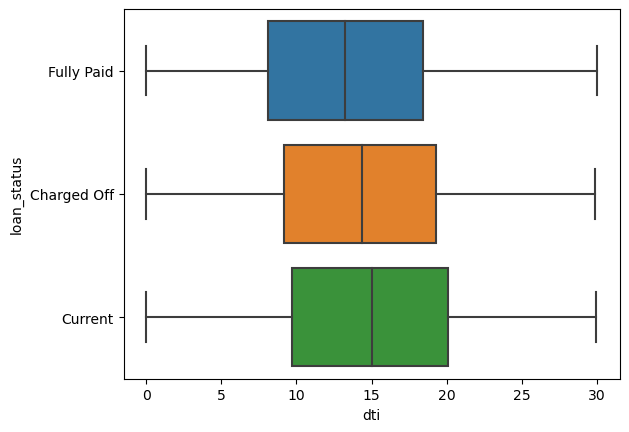

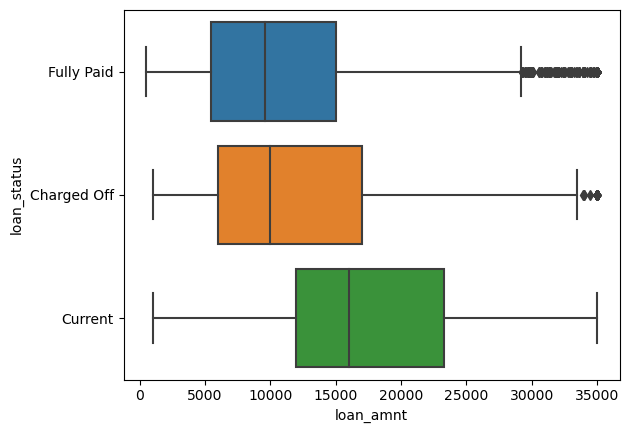

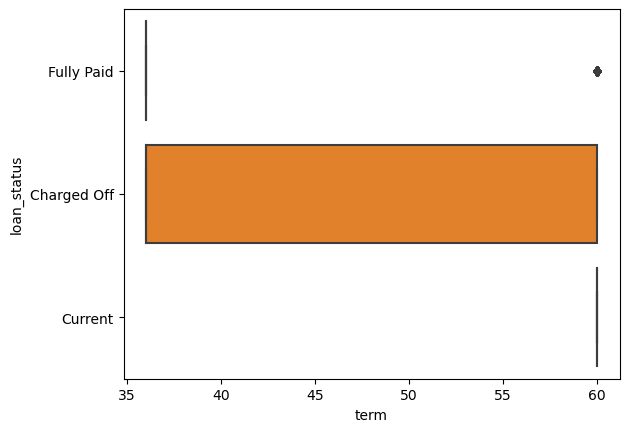

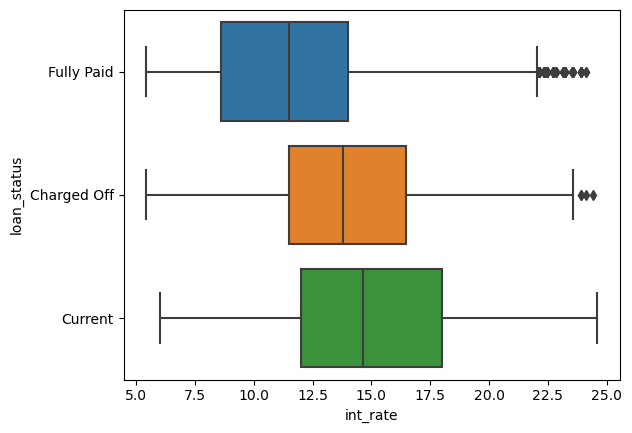

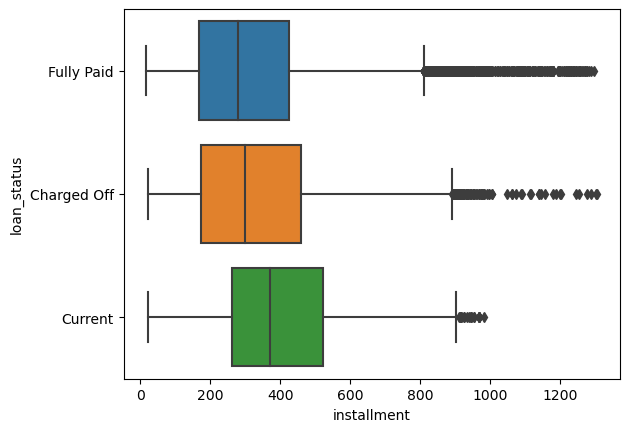

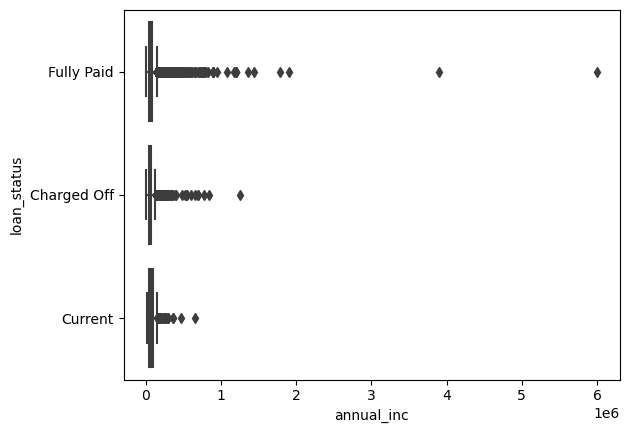

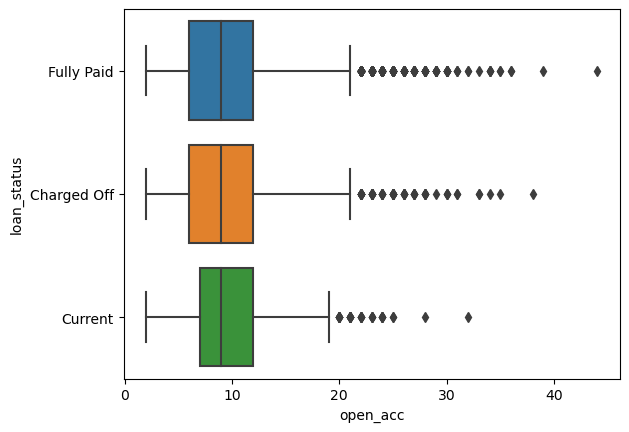

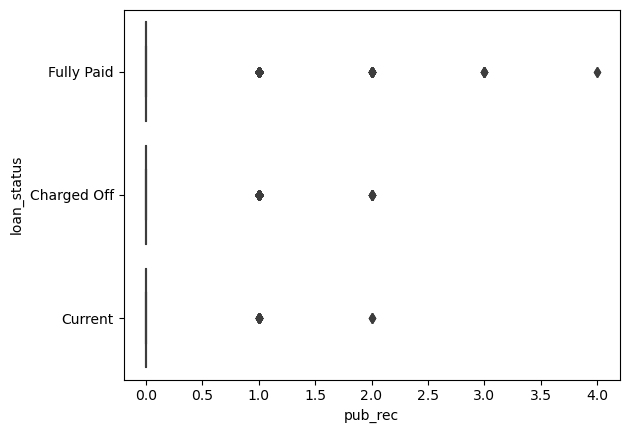

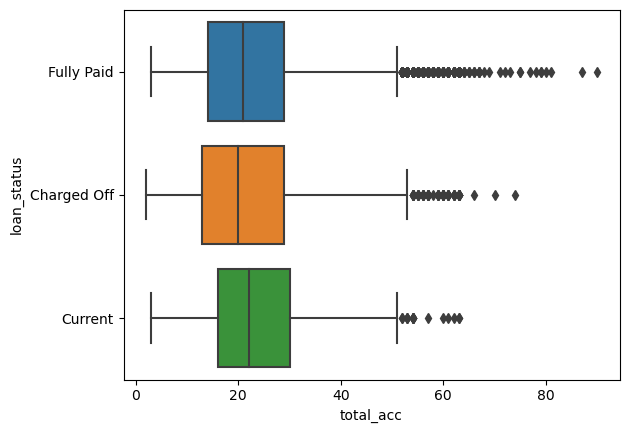

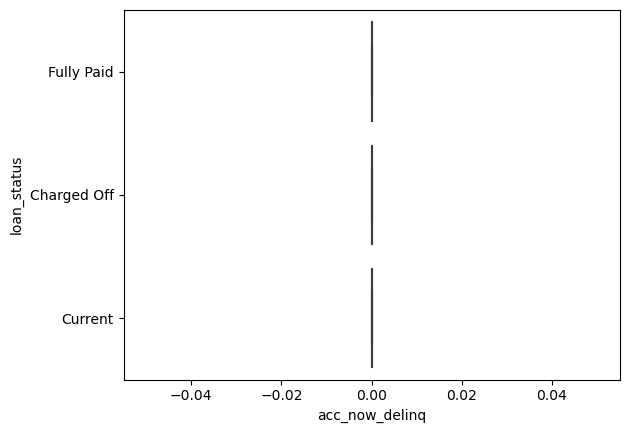

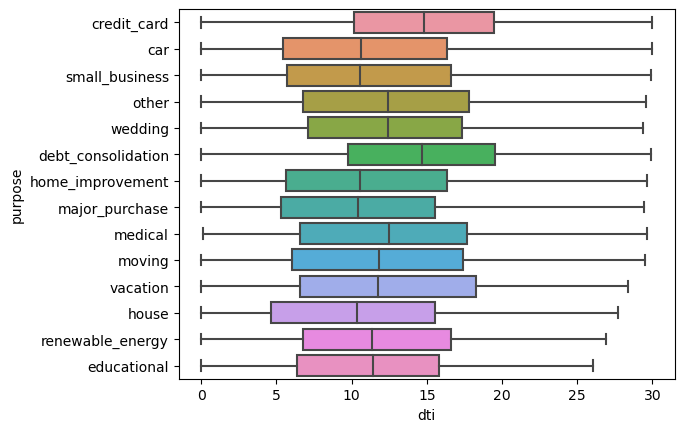

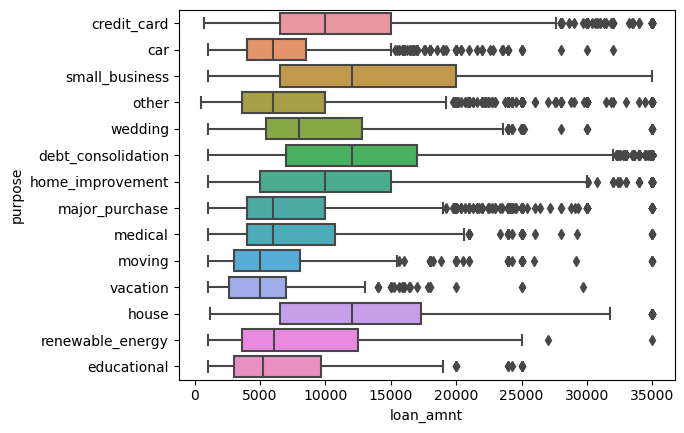

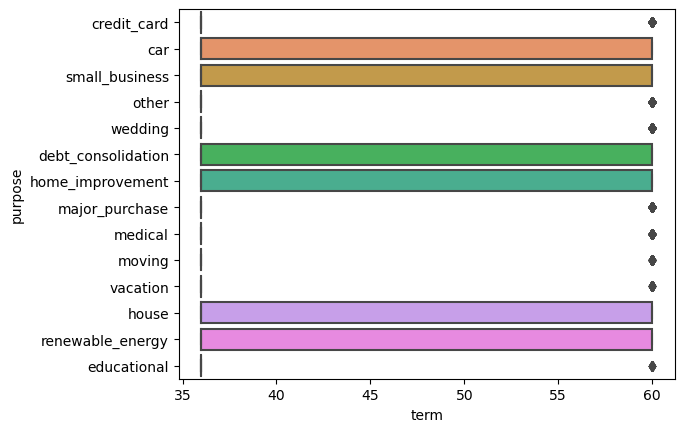

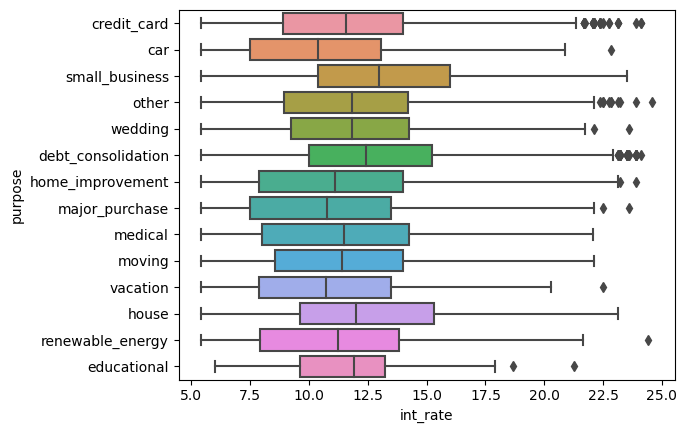

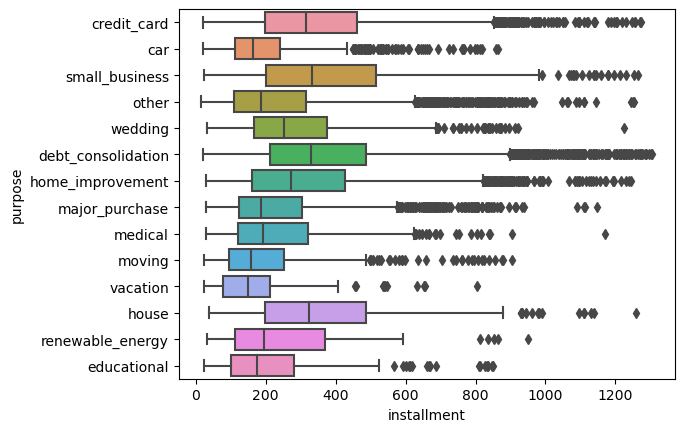

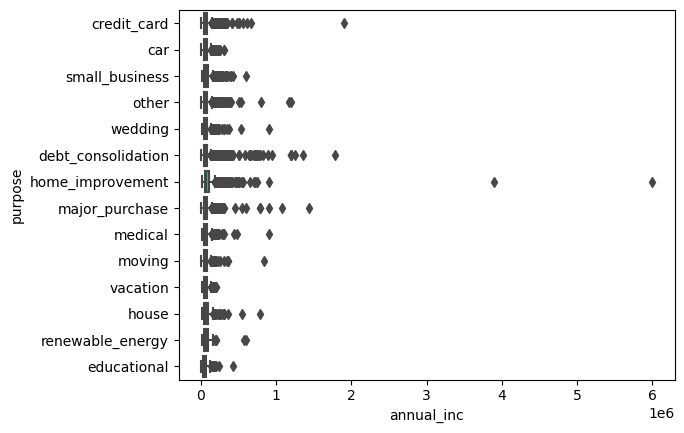

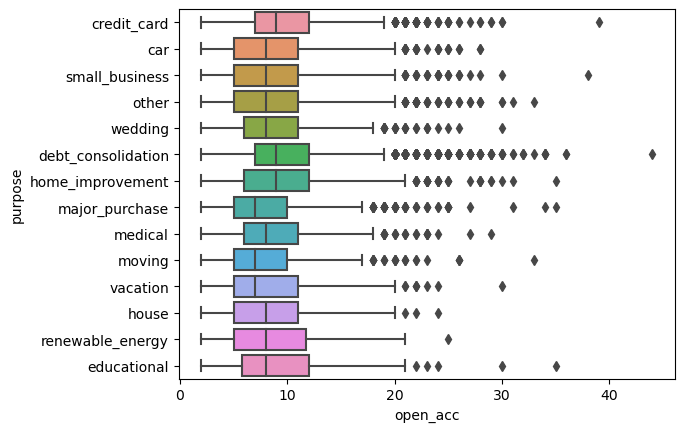

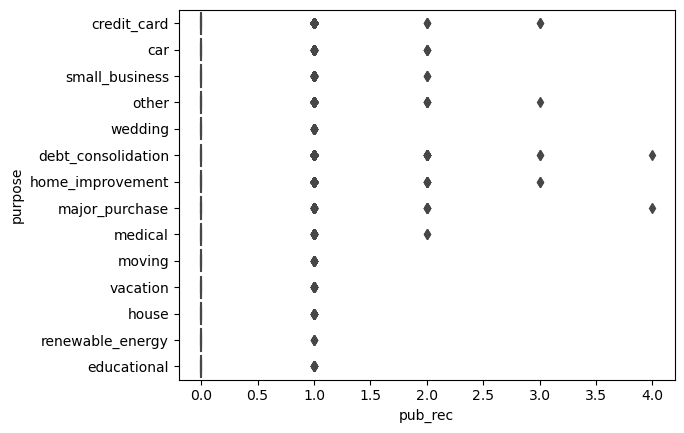

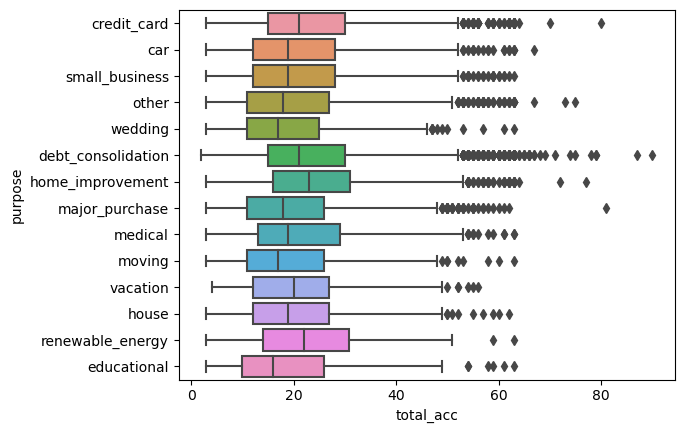

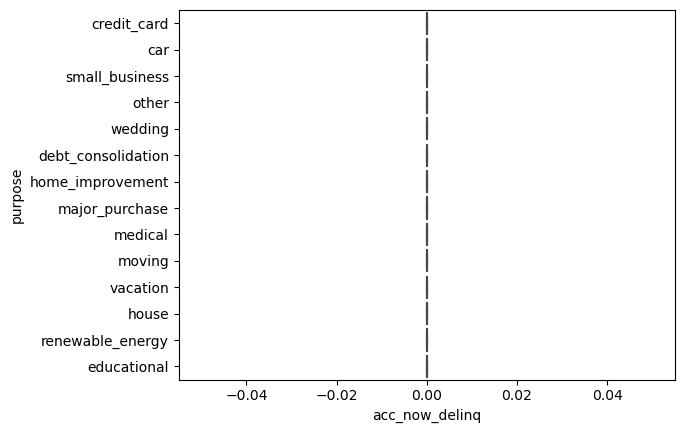

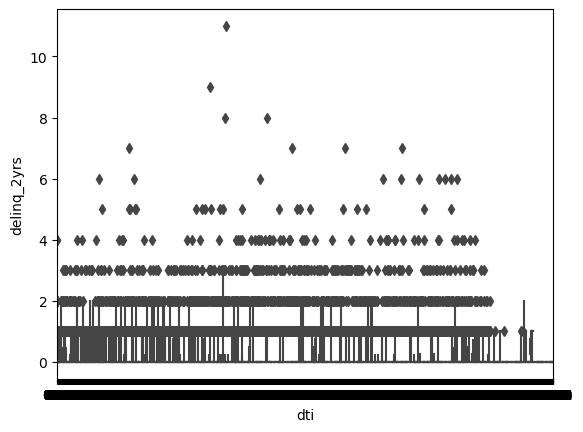

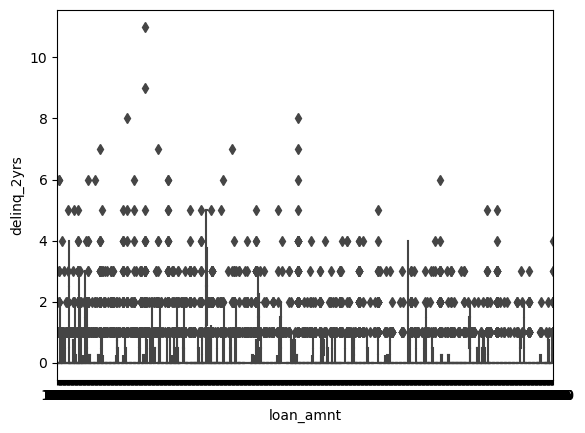

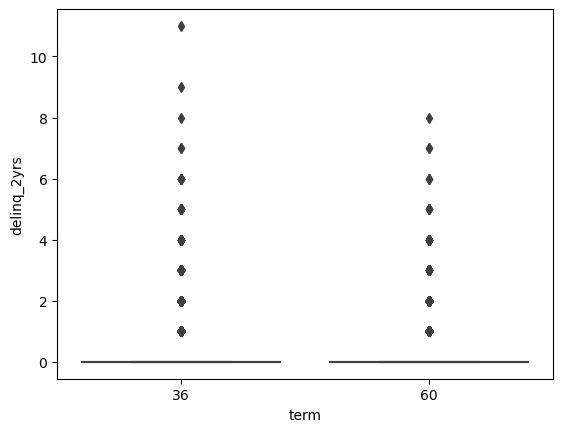

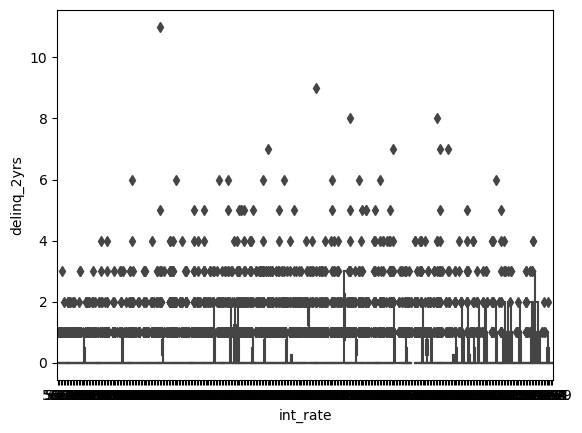

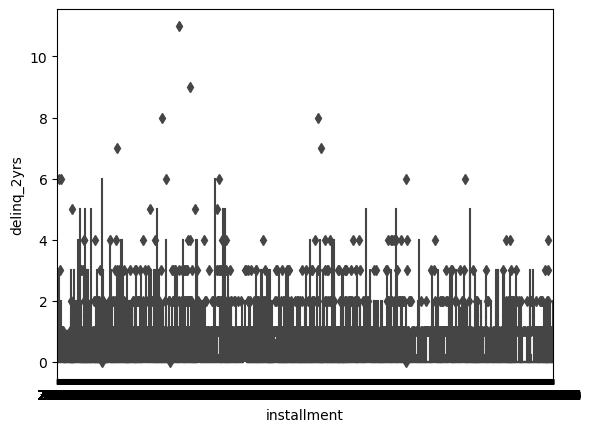

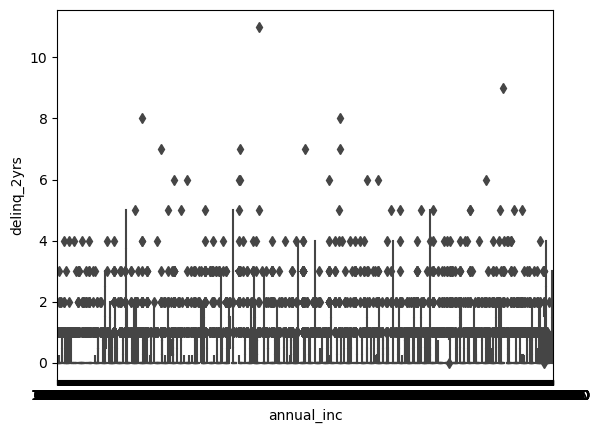

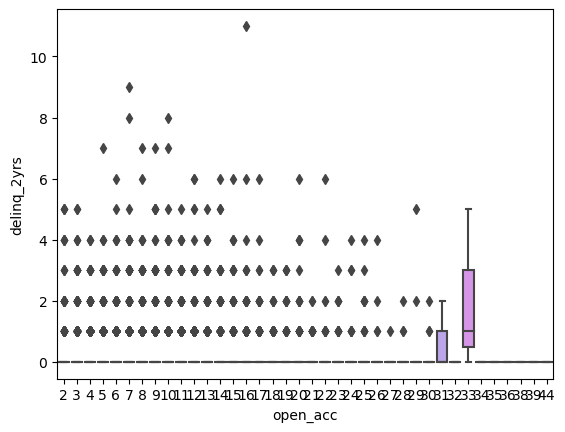

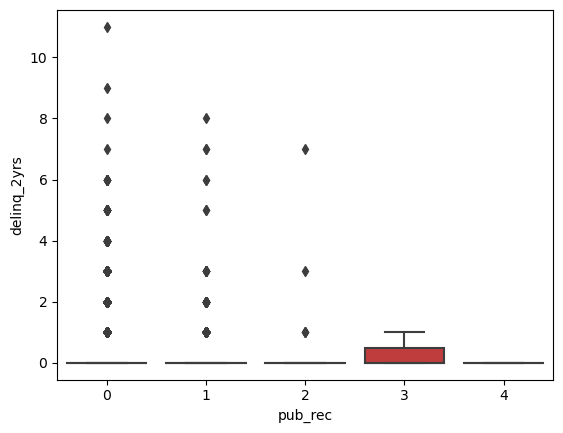

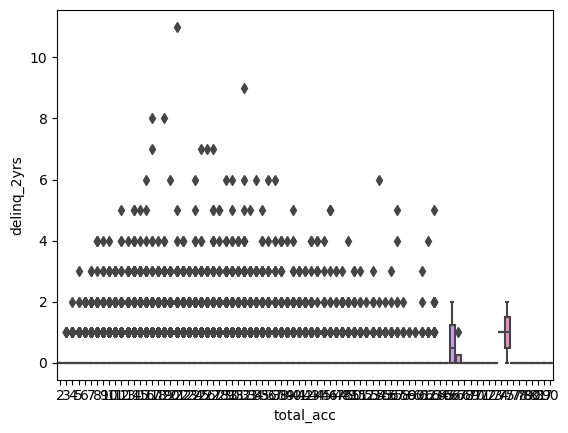

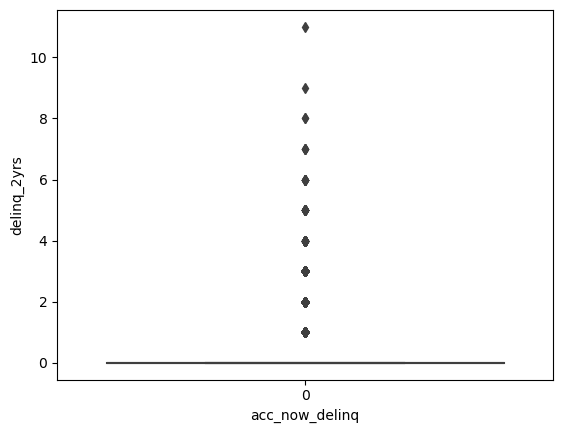

In [68]:
for col1 in cat_cols:
    for col2 in bv_cols:
        sns.boxplot(x=df[col2], y=df[col1])
        plt.show()

In [76]:
new_df = df.drop(extras_cols, axis=1)
new_df = new_df.drop("acc_now_delinq", axis=1)

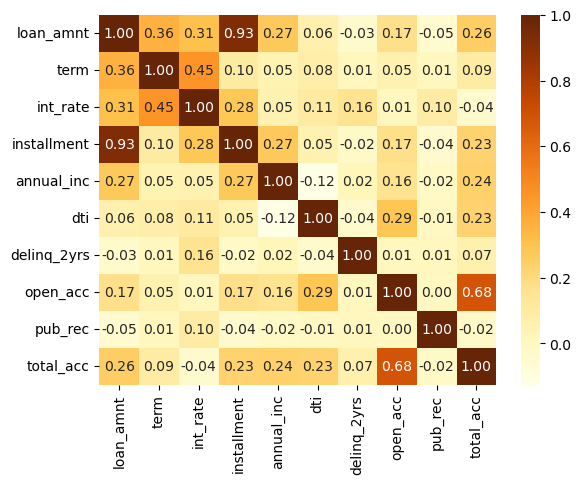

In [77]:
sns.heatmap(new_df.corr(), annot=True, cmap='YlOrBr', fmt='.2f')
plt.show()

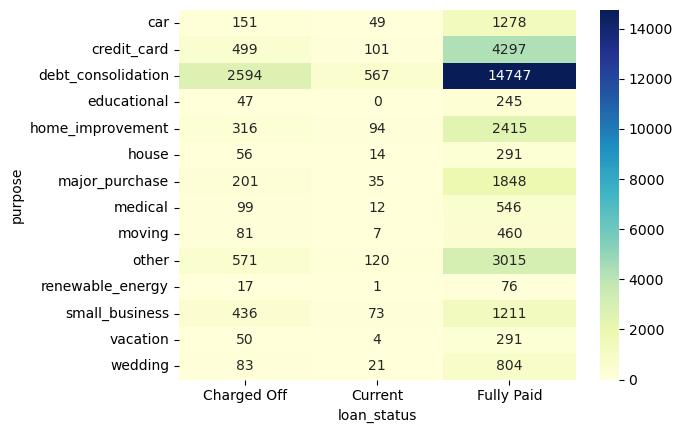

In [80]:
## Categorical vs Categorical

crosstab_result = pd.crosstab(df['purpose'], df['loan_status'])
sns.heatmap(crosstab_result, annot=True, cmap='YlGnBu', fmt='d')
plt.show()